<a href="https://colab.research.google.com/github/olaakintola/WheelSpace/blob/main/BusSmote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SMOTE, ENTIRE BUS DATA READ INTO CODELAB TRAIN-TEST SPLIT

# The machine learning model was created reading the entire bus data and 
# splitting into training and test datasets using train-test-split function 
# from sklearn. SMOTE Sampling technique was used to augument the training dataset.
# Random Forest classifier was used here.

# smote sampling technique was used with xgboost in the second part of this code

!pip install -q sklearn

In [2]:
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, division, print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bus_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/busdata.csv")


In [5]:
bus_df["wheeloccupancy"] = bus_df["wheeloccupancy"].fillna(0).astype(int)

In [6]:
bus_df["wheeloccupancy"]

0         0
1         0
2         0
3         0
4         0
         ..
145436    0
145437    0
145438    0
145439    0
145440    0
Name: wheeloccupancy, Length: 145441, dtype: int64

In [7]:
bus_df.shape

(145441, 6)

In [8]:
bus_df.sample(5)

,route,times,days,wheeloccupancy,departure,destination
140905,25X,08:00,wed,0,NaN,NaN
144736,77X,11:00,tues,0,NaN,NaN
125651,66,18:00,mon,0,NaN,NaN
143003,44,18:00,tues,0,NaN,NaN
108410,77X,09:00,fri,0,NaN,NaN


In [9]:
bus_df.fillna('', inplace=True)

In [10]:
bus_df.sample(5)

,route,times,days,wheeloccupancy,departure,destination
141251,29A,18:00,mon,0,,
82572,46E,07:00,tues,0,,
47159,66X,18:00,fri,0,,
55992,25B,07:00,tues,0,,
98840,29A,15:00,tues,0,,


In [11]:
bus_df[bus_df.wheeloccupancy==1]

,route,times,days,wheeloccupancy,departure,destination
86,11,09:00,wed,1,"""Drummartin Park, stop 3024""","""Parnell Square West, stop 10"""
126,116,13:00,mon,1,"""Teresian School, stop 771""","""Stillorgan College, stop 2011"""
134,116,09:00,tues,1,"""Stillorgan Luas, stop 7057""","""Carmanhall Road, stop 3181"""
182,118,09:00,mon,1,"""St Johns Ambulance, stop 907""","""Donnybrook Garda Stn, stop 774"""
243,120,10:00,mon,1,"""Naomh Fionnbarra GAA, stop 4485""","""St Finbar's Road, stop 829"""
...,...,...,...,...,...,...
145264,84A,11:00,mon,1,"""St John's Church, stop 3080""","""Old Connaught Avenue, stop 4129"""
145275,84A,10:00,tues,1,"""Castle Street, stop 4130""","""Merrion Gates, stop 476"""
145299,84A,10:00,thurs,1,"""St James's Church, stop 4203""","""Shrewsbury Lawn, stop 3130"""
145324,84X,11:00,mon,1,"""St Anthony Church, stop 4268""","""Greystones Station, stop 4283"""


In [12]:
bus_df["departure"] = [x.replace("'","").replace('"','') for x in bus_df["departure"]]

In [13]:
bus_df["destination"] = [x.replace("'","").replace('"','') for x in bus_df["destination"]]

In [14]:
bus_df.drop("departure", axis="columns", inplace=True)

In [15]:
bus_df.drop("destination", axis="columns", inplace=True)

In [16]:
bus_df.dtypes

route             object
times             object
days              object
wheeloccupancy     int64
dtype: object

In [17]:
bus_df.head()

,route,times,days,wheeloccupancy
0,1,07:00,mon,0
1,1,08:00,mon,0
2,1,09:00,mon,0
3,1,10:00,mon,0
4,1,11:00,mon,0


In [20]:

X = bus_df.drop("wheeloccupancy", axis="columns")
y = bus_df["wheeloccupancy"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

Text(0.5, 0, '% wheeloccupancy')

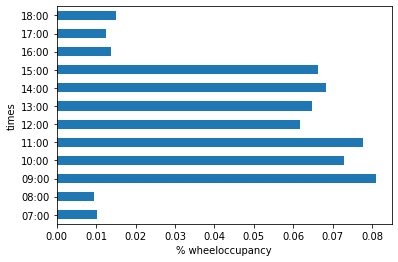

In [23]:
pd.concat([X_train, y], axis=1).groupby("times").wheeloccupancy.mean().plot(kind="barh").set_xlabel("% wheeloccupancy")

Text(0.5, 0, '% wheeloccupancy')

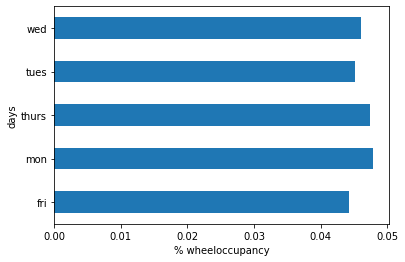

In [24]:
pd.concat([X_train, y], axis=1).groupby("days").wheeloccupancy.mean().plot(kind="barh").set_xlabel("% wheeloccupancy")

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5) 

In [25]:
import numpy
unique, counts = numpy.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 110983, 1: 5369}

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
X_train_hot=ohe.fit_transform(X_train)
X_test_hot=ohe.transform(X_test)

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_sample(X_train_hot,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(trainingdata_encode_shuffle, train_label_shuffle)
#print(clf.predict([[0, 0, 0, 0]]))
#my second version
#clf.fit(trainingdata_encode, train_label)

#bus_df_encode variables
clf.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
preds_hot_busdf = clf.predict(X_test_hot) #bus_df  smote version

In [30]:
preds_hot_busdf[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [31]:
y_test[:10]

12684     0
11685     0
31714     0
87103     0
121472    0
16116     0
54594     0
110528    0
20487     1
124328    0
Name: wheeloccupancy, dtype: int64

In [32]:
from sklearn.metrics import  confusion_matrix, classification_report

print(classification_report (y_test, preds_hot_busdf) )

              precision    recall  f1-score   support

           0       0.98      0.45      0.62     27674
           1       0.07      0.83      0.13      1415

    accuracy                           0.47     29089
   macro avg       0.53      0.64      0.38     29089
weighted avg       0.94      0.47      0.60     29089



In [33]:
# this step involved the use of smote with xgboost
import xgboost as xgb

In [34]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_sm,y_sm)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
xg_predictions = xgb_classifier.predict(X_test_hot)

In [36]:
xg_predictions[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [37]:
y_test[:10]

12684     0
11685     0
31714     0
87103     0
121472    0
16116     0
54594     0
110528    0
20487     1
124328    0
Name: wheeloccupancy, dtype: int64

In [38]:
from sklearn.metrics import  confusion_matrix, classification_report

print(classification_report (y_test, xg_predictions) )

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     27674
           1       0.07      0.87      0.13      1415

    accuracy                           0.45     29089
   macro avg       0.53      0.65      0.37     29089
weighted avg       0.94      0.45      0.58     29089

